## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Heart.csv',index_col=0)
df=df.dropna()

In [2]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

## X와 y 분리하기

In [4]:
y=df.pop('AHD')
y=(y=='Yes')*1
X=df

In [5]:
y

1      0
2      1
3      1
4      0
5      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: AHD, Length: 297, dtype: int64

## 범주형 변수 One_hot_encoding 하기

In [6]:
X = pd.get_dummies(X)
X

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,0,123,1,0.2,2,0.0,1,0,0,0,0,0,1
299,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,0,1,0,0,1
300,68,1,144,193,1,0,141,0,3.4,2,2.0,1,0,0,0,0,0,1
301,57,1,130,131,0,0,115,1,1.2,2,1.0,1,0,0,0,0,0,1


## 수치데이터 정규화하기

In [7]:
X_std = (X-X.mean())/X.std()
X_std = np.array(X_std, dtype=float) # keras : 실수형 데이터 처리만 가능
y = np.array(y, dtype=float)

## 모델 만들기

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu',input_shape=[X_std.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid') # 치역이 0~1로 확률값을 갖기 위함
    ])

    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
model=build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1216      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_std, y, epochs=1000, validation_split=0.2)

In [14]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 100.0)

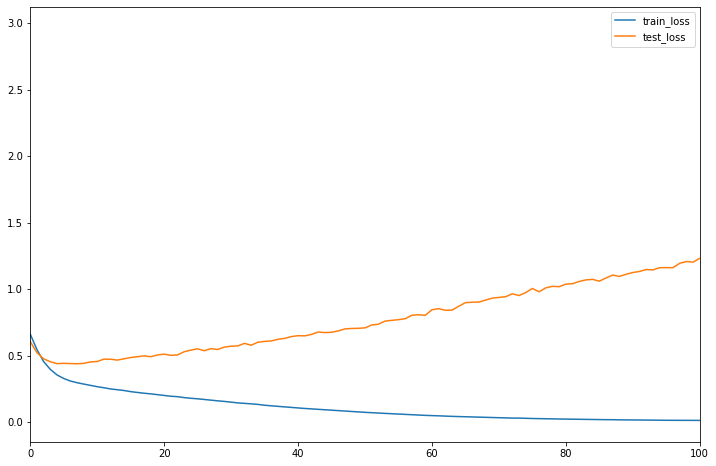

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='test_loss')
plt.legend()
plt.xlim([0, 100])

과적합이 일어나고 있음

(0.0, 100.0)

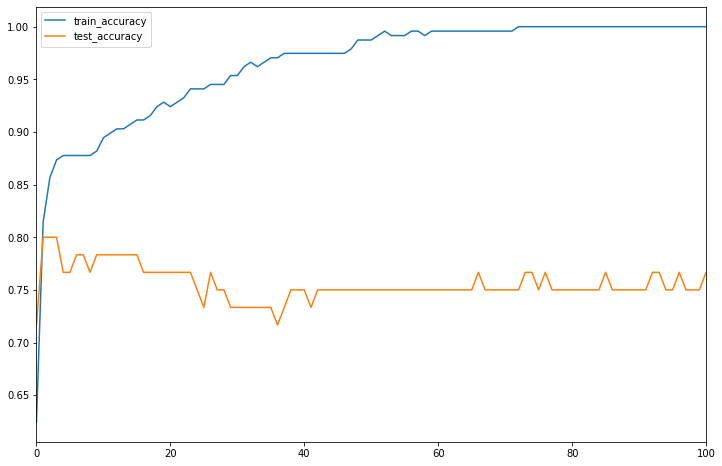

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='test_accuracy')
plt.legend()
plt.xlim([0, 100])

과적합을 방지하기 위한 방법 ?

## Early Stopping

In [23]:
model = build_model()

In [24]:
# 조기 종료 시점 : test 데이터의 손실함수가 10번 넘게 개선되지 않을 경우
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)    

In [25]:
history = model.fit(X_std, y, epochs=1000, validation_split=0.2, callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 25ms/step - loss: 0.6386 - accuracy: 0.5907 - val_loss: 0.6236 - val_accuracy: 0.6667
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.5264 - accuracy: 0.8143 - val_loss: 0.5634 - val_accuracy: 0.7167
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4499 - accuracy: 0.8692 - val_loss: 0.5327 - val_accuracy: 0.7167
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.3941 - accuracy: 0.8734 - val_loss: 0.5183 - val_accuracy: 0.7333
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3558 - accuracy: 0.8692 - val_loss: 0.5143 - val_accuracy: 0.7500
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3285 - accuracy: 0.8819 - val_loss: 0.5100 - val_accuracy: 0.7667
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.8819 - val_loss: 0.5209 - val_accuracy: 0.7667
Epoch 8/1000
8/8 [=

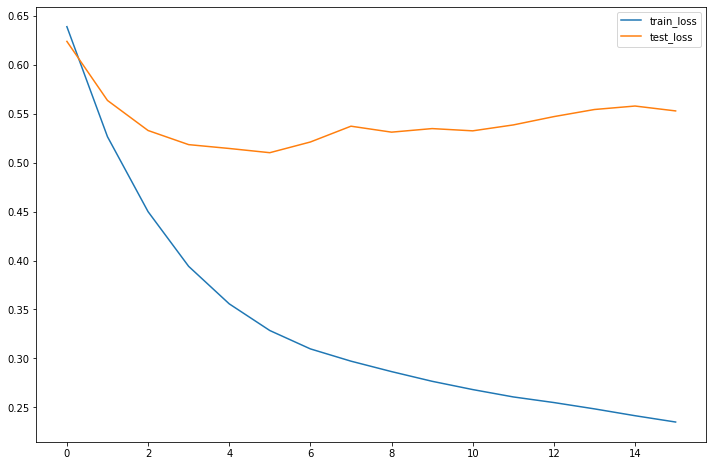

In [26]:
history = history.history
plt.figure(figsize=(12, 8))
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='test_loss')
plt.legend()

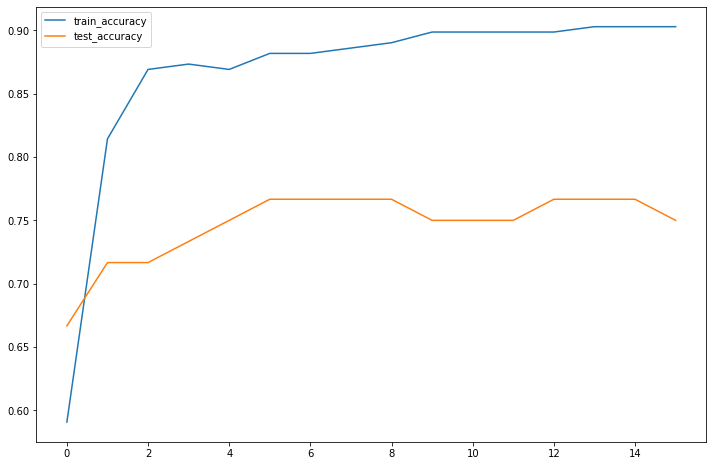

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='test_accuracy')
plt.legend()

딥러닝은 작은 데이터를 다루기엔 너무 유연한 도구임  
쉽게 오버피팅이 일어나므로 추천하지 않음  
기울기나 계수를 얻어 설명 가능하지도 않음